In [32]:
import cv2
import mediapipe as mp
import os
import pandas as pd
import math as m
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
import pickle
from main_functions import euc_distance, create_features_dict

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
face_data = {'teta1':0,'teta2':0,'teta3': 0,'teta4': 0,'teta5': 0,'teta6': 0,'teta7': 0,
'teta8': 0,'teta9': 0,'teta10': 0}
faces = pd.DataFrame(face_data,index=[0])

In [35]:
# Face points
P = {0:	61, 1: 292, 2: 0, 3: 17, 4:	50,	5: 280,	6: 48, 7: 4, 8:	289, 9:	206, 10: 426, 11: 133, 12: 130, 13: 159,\
14:	145, 15: 362, 16: 359, 17: 386, 18:	374, 19: 122, 20: 351, 21: 46, 22: 105, 23: 107, 24: 276, 25: 334, 26:	336}

In [55]:
face_mesh = mp_face_mesh.FaceMesh(
  max_num_faces=50,
  refine_landmarks= True,
  min_detection_confidence=0.3,
  min_tracking_confidence=0.05)

points = [i for i in range (469)]
points_dict = {i : 0 for i in range(469)}

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

create_features_dict(image, points, points_dict, P, s = 0)

def create_features_dict(image_path):
    images2 = os.listdir(image_path)
    faces = pd.DataFrame(face_data,index=[0])
    s=0
    for idx, file in enumerate(images2):
        df = {}
        df1 = {}
        image = cv2.imread(image_path+'/'+file)
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks:
            annotated_image = image.copy()
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_tesselation_style())
                mp_drawing.draw_landmarks(
                    image=annotated_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_contours_style())
                mp_drawing.draw_landmarks(
                    image=annotated_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_IRISES,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_iris_connections_style())

                for id, point in enumerate(face_landmarks.landmark):
                    if id in points:
                        width, height, color = image.shape
                        width, height = int(point.x * width), int(point.y * height)
                        points_dict[id] = [width, height]
# θ1	(2, 0,3)
# θ2	(0, 2,1)
# θ3	(6, 7, 8)
# θ4	(9, 7, 10)
# θ5	(0, 7, 1)
# θ6	(1, 5, 8)
# θ7	(1, 10, 8)
# θ8	(13, 12, 14)
# θ9	(21, 22, 23)
# θ10	(6, 19, 23)
            ### ANGLES
            # df['teta1_1'] = 57.296 * m.atan((points_dict[P[0]][1] - points_dict[P[3]][1])/(points_dict[P[0]][0] - points_dict[P[3]][0]+0.0001))+\
            #            57.296 * m.atan((points_dict[P[0]][1] - points_dict[P[2]][1])/(points_dict[P[2]][0] - points_dict[P[0]][0]+0.0001))
            ####
            df['teta1'] = 57.296 *  m.acos(((points_dict[P[2]][0] - points_dict[P[0]][0])*(points_dict[P[3]][0] - points_dict[P[0]][0]) +\
                  (points_dict[P[2]][1] - points_dict[P[0]][1])*(points_dict[P[3]][1] - points_dict[P[0]][1]))/\
                 ((euc_distance(points_dict[P[0]],points_dict[P[2]]) * euc_distance(points_dict[P[0]],points_dict[P[3]]))+0.0001))
            teta2 = 57.296 * m.acos(((points_dict[P[0]][0] - points_dict[P[2]][0])*(points_dict[P[1]][0] - points_dict[P[2]][0])+\
                  (points_dict[P[0]][1] - points_dict[P[2]][1])*(points_dict[P[1]][1] - points_dict[P[2]][1]))/\
                 ((euc_distance(points_dict[P[0]],points_dict[P[2]]) * euc_distance(points_dict[P[2]],points_dict[P[1]]))+0.0001))
            sign = ((points_dict[P[1]][1] - points_dict[P[2]][1]<0) and (points_dict[P[0]][1] - points_dict[P[2]][1])<0) * (-1)
            # # df['teta2_1'] = sign
            df['teta2'] =m.copysign(teta2, sign)
            # df['teta2'] = teta2
            df['teta3'] = 57.296 *  m.acos(((points_dict[P[6]][0] - points_dict[P[7]][0])*(points_dict[P[8]][0] - points_dict[P[7]][0]) +\
                 (points_dict[P[6]][1] - points_dict[P[7]][1])*(points_dict[P[8]][1] - points_dict[P[7]][1]))/ \
                ((euc_distance(points_dict[P[6]],points_dict[P[7]]) * euc_distance(points_dict[P[8]],points_dict[P[7]]))+0.0001) )
            df['teta4'] = 57.296 *  m.acos(((points_dict[P[9]][0] - points_dict[P[7]][0])*(points_dict[P[10]][0] - points_dict[P[7]][0]) +\
                 (points_dict[P[9]][1] - points_dict[P[7]][1])*(points_dict[P[10]][1] - points_dict[P[7]][1]))/\
                ((euc_distance(points_dict[P[9]],points_dict[P[7]]) * euc_distance(points_dict[P[10]],points_dict[P[7]]))+0.0001))
            df['teta5'] = 57.296 *  m.acos(((points_dict[P[0]][0] - points_dict[P[7]][0])*(points_dict[P[1]][0] - points_dict[P[7]][0]) +\
                 (points_dict[P[0]][1] - points_dict[P[7]][1])*(points_dict[P[1]][1] - points_dict[P[7]][1]))/\
                ((euc_distance(points_dict[P[0]],points_dict[P[7]]) * euc_distance(points_dict[P[1]],points_dict[P[7]]))+0.0001))
            df['teta6'] = 57.296 *  m.acos(((points_dict[P[1]][0] - points_dict[P[5]][0])*(points_dict[P[8]][0] - points_dict[P[5]][0]) +\
                 (points_dict[P[1]][1] - points_dict[P[5]][1])*(points_dict[P[8]][1] - points_dict[P[5]][1]))/\
                ((euc_distance(points_dict[P[1]],points_dict[P[5]]) * euc_distance(points_dict[P[8]],points_dict[P[5]]))+0.0001))
            df['teta7'] = 57.296 *  m.acos(((points_dict[P[1]][0] - points_dict[P[10]][0])*(points_dict[P[8]][0] - points_dict[P[10]][0]) +\
                 (points_dict[P[1]][1] - points_dict[P[10]][1])*(points_dict[P[8]][1] - points_dict[P[10]][1]))/\
                ((euc_distance(points_dict[P[1]],points_dict[P[10]]) * euc_distance(points_dict[P[8]],points_dict[P[10]]))+0.0001))
            df['teta8'] = 57.296 *  m.acos(((points_dict[P[13]][0] - points_dict[P[12]][0])*(points_dict[P[14]][0] - points_dict[P[12]][0]) +\
                 (points_dict[P[13]][1] - points_dict[P[12]][1])*(points_dict[P[14]][1] - points_dict[P[12]][1]))/\
                ((euc_distance(points_dict[P[13]],points_dict[P[12]]) * euc_distance(points_dict[P[14]],points_dict[P[12]]))+0.0001) )
            df['teta9'] = 57.296 *  m.acos(((points_dict[P[21]][0] - points_dict[P[22]][0])*(points_dict[P[23]][0] - points_dict[P[22]][0]) +\
                 (points_dict[P[21]][1] - points_dict[P[22]][1])*(points_dict[P[23]][1] - points_dict[P[22]][1]))/\
                ((euc_distance(points_dict[P[21]],points_dict[P[22]]) * euc_distance(points_dict[P[23]],points_dict[P[22]]))+0.0001))
            df['teta10'] = 57.296 *  m.acos(((points_dict[P[6]][0] - points_dict[P[19]][0])*(points_dict[P[23]][0] - points_dict[P[19]][0]) +\
                 (points_dict[P[6]][1] - points_dict[P[19]][1])*(points_dict[P[23]][1] - points_dict[P[19]][1]))/\
                ((euc_distance(points_dict[P[6]],points_dict[P[19]]) * euc_distance(points_dict[P[23]],points_dict[P[19]]))+0.0001))
            ### DISTANCES
            df['l_eye_w'] = euc_distance(points_dict[362],points_dict[359])/euc_distance(points_dict[10],points_dict[152])
            df['l_eye_h'] = euc_distance(points_dict[386],points_dict[374])/euc_distance(points_dict[10],points_dict[152])
            df['r_eye_w'] = euc_distance(points_dict[130],points_dict[133])/euc_distance(points_dict[10],points_dict[152])
            df['r_eye_h'] = euc_distance(points_dict[159],points_dict[145])/euc_distance(points_dict[10],points_dict[152])
            df['lips_w'] = euc_distance(points_dict[61],points_dict[292])/euc_distance(points_dict[10],points_dict[152])
            df['lips_h'] = euc_distance(points_dict[0],points_dict[17])/euc_distance(points_dict[10],points_dict[152])
            df['lips_h_in'] = euc_distance(points_dict[13],points_dict[14])/euc_distance(points_dict[10],points_dict[152])
            df['brows_dist'] = euc_distance(points_dict[55],points_dict[285])/euc_distance(points_dict[10],points_dict[152])
            df['r_cheek_eye'] = euc_distance(points_dict[280],points_dict[446])/euc_distance(points_dict[10],points_dict[152])
            df['l_cheek_eye'] = euc_distance(points_dict[50],points_dict[226])/euc_distance(points_dict[10],points_dict[152])
            df['r_cheek_lip'] = euc_distance(points_dict[280],points_dict[287])/euc_distance(points_dict[10],points_dict[152])
            df['l_cheek_lip'] = euc_distance(points_dict[50],points_dict[57])/euc_distance(points_dict[10],points_dict[152])
            df['r_eye_brow_in'] = euc_distance(points_dict[285],points_dict[464])/euc_distance(points_dict[10],points_dict[152])
            df['l_eye_brow_in'] = euc_distance(points_dict[55],points_dict[243])/euc_distance(points_dict[10],points_dict[152])
            df['r_eye_brow_out'] = euc_distance(points_dict[300],points_dict[446])/euc_distance(points_dict[10],points_dict[152])
            df['l_eye_brow_out'] = euc_distance(points_dict[70],points_dict[226])/euc_distance(points_dict[10],points_dict[152])
            df['r_eye_nose_in'] = euc_distance(points_dict[133],points_dict[100])/euc_distance(points_dict[10],points_dict[152])
            df['l_eye_nose_in'] = euc_distance(points_dict[463],points_dict[329])/euc_distance(points_dict[10],points_dict[152])
        else:
            df['teta1']=0 #, 'teta2', 'teta3', 'teta4', 'teta5', 'teta6', 'teta7', 'teta8', 'teta9', 'teta10', 'l_eye_w',\
            #        'l_eye_h', 'r_eye_w', 'r_eye_h', 'lips_w', 'lips_h', 'lips_h_in', 'brows_dist', 'r_cheek_eye', 'l_cheek_eye',\
            #         'r_cheek_lip', 'l_cheek_lip', 'r_eye_brow_in', 'l_eye_brow_in', 'r_eye_brow_out', 'l_eye_brow_out', 'r_eye_nose_in',\
            #          'l_eye_nose_in'] = 0
            df['teta2'] = 0
            df['teta3'] = 0
            df['teta4'] = 0
            df['teta5'] = 0
            df['teta6'] = 0
            df['teta7'] = 0
            df['teta8'] = 0
            df['teta9'] = 0
            df['teta10'] = 0
            df['l_eye_w'] = 0
            df['l_eye_h'] = 0
            df['r_eye_w'] = 0
            df['r_eye_h'] = 0
            df['lips_w'] = 0
            df['lips_h'] = 0
            df['lips_h_in'] = 0 
            df['brows_dist'] = 0
            df['r_cheek_eye'] = 0
            df['l_cheek_eye'] = 0
            df['r_cheek_lip'] = 0
            df['l_cheek_lip'] = 0
            df['r_eye_brow_in'] = 0
            df['l_eye_brow_in'] = 0
            df['r_eye_brow_out'] = 0
            df['l_eye_brow_out'] = 0
            df['r_eye_nose_in'] = 0
            df['l_eye_nose_in'] = 0
        s+=1
        faces_data_frame = pd.DataFrame(df,index=[s])
        faces_data_frame['path'] = image_path+'/'+file
        faces = pd.concat([faces, faces_data_frame])
    return faces

In [56]:
faces_angry =create_features_dict('train/Anger').copy()
faces_angry = faces_angry.drop(faces_angry[faces_angry['teta1']==0].index)

In [59]:
faces_neutral=create_features_dict('train/neutral').copy()
faces_neutral = faces_neutral.drop(faces_neutral[faces_neutral['teta1']==0].index)

In [60]:
faces_happy=create_features_dict('train/Happy').copy()
faces_happy = faces_happy.drop(faces_happy[faces_happy['teta1']==0].index)

In [61]:
faces_sad=create_features_dict('train/Sad').copy()
faces_sad = faces_sad.drop(faces_sad[faces_sad['teta1']==0].index)

In [63]:
faces_fear=create_features_dict('train/Fear').copy()
faces_fear = faces_fear.drop(faces_fear[faces_fear['teta1']==0].index)

In [65]:
faces_disgust=create_features_dict('train/disgust').copy()
faces_disgust = faces_disgust.drop(faces_disgust[faces_disgust['teta1']==0].index)

In [67]:
faces_surprise=create_features_dict('train/Surprise').copy()
faces_surprise = faces_surprise.drop(faces_surprise[faces_surprise['teta1']==0].index)

In [69]:
faces_sad['target']='sad'
faces_happy['target']='happy'
faces_angry['target']='angry'
faces_neutral['target']='neutral'
faces_surprise['target']='surprise'
faces_fear['target']='fear'
faces_disgust['target']='disgust'

In [53]:
df_1 = pd.concat([faces_neutral, faces_sad, faces_happy, faces_surprise]).reset_index()

In [29]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} Количество пропущенных значений: {}'.format(col, df[col].isnull().sum()))
    print('\n')

display_missing(df_1)

index Количество пропущенных значений: 0
brows_dist Количество пропущенных значений: 362
l_cheek_eye Количество пропущенных значений: 362
l_cheek_lip Количество пропущенных значений: 362
l_eye_brow_in Количество пропущенных значений: 362
l_eye_brow_out Количество пропущенных значений: 362
l_eye_h Количество пропущенных значений: 362
l_eye_nose_in Количество пропущенных значений: 362
l_eye_w Количество пропущенных значений: 362
lips_h_in Количество пропущенных значений: 362
lips_h Количество пропущенных значений: 362
lips_w Количество пропущенных значений: 362
path Количество пропущенных значений: 362
('path', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '') Количество пропущенных значений: 3786
r_cheek_eye Количество пропущенных значений: 362
r_cheek_lip Количество пропущенных значений: 362
r_eye_brow_in Количество пропущенных значений: 362
r_eye_brow_out Количество пропущенных значений: 362
r_eye_h Количество пропущенных значе

In [53]:
pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(df_1.drop(['index','path', 'target'], axis=1))

In [662]:
x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(x_train_pca, df_1['target'],\
                                                        random_state=555, test_size=0.2, shuffle = True)

In [142]:
x_train, x_valid, y_train, y_valid = train_test_split(df_1.drop(['index'], axis=1), df_1['target'],\
                                                      random_state=666, test_size=0.2, shuffle = True)

In [28]:
cl_emo_1 = KNeighborsClassifier()
params = {
    'n_neighbors': [1,3, 5,7, 10,20,30,40,50],
    'weights': ['uniform', 'distance'],
}   
cv = GridSearchCV(cl_emo_1, param_grid=params, scoring='accuracy', cv=5, 
                  n_jobs=4)
cv.fit(x_train.drop(['path'], axis=1), y_train)
# cv.fit(x_train_1, y_train_1)
# y_pred_valid = cv.best_estimator_.predict(x_valid)
# # acc = 1 - sum(abs(y_pred_valid- y_valid))/len(y_valid)
# x_valid_pict1['prediction'] = y_pred_valid
# x_valid_pict1['mistake'] = abs(y_pred_valid- y_valid)
# x_valid_pict1['target'] = y_valid
# acc
filename = 'cl_emo_knn.sav'
pickle.dump(cv.best_estimator_, open(filename, 'wb'))
cv.best_score_, cv.best_params_

(0.7797256089245288, {'n_neighbors': 10, 'weights': 'distance'})

In [66]:
path = '/Users/olgakrylova/ds_bootcamp/Emotions/emo_train/fear'
face =create_features_dict(path)

cv.best_estimator_.predict(face.drop(['index','path','target'][1], axis=1))

array(['2', '0', '3', ..., '1', '0', '0'], dtype=object)

In [67]:
a = cv.best_estimator_.predict(face.drop(['index','path','target'][1], axis=1))

In [76]:
    print(a)

['2' '0' '3' ... '1' '0' '0']


In [ ]:
# # load model
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(x_face_valid, y_face_valid)
# print(result)

0.8153846153846154


In [470]:
# cl_emo_2 = RandomForestClassifier()
# from sklearn.model_selection import train_test_split
# params = {
#     'n_estimators': [10, 50, 100, 300, 500, 700, 1000],
#     'criterion': ['gini', 'entropy', 'log_loss'], 
#     'max_depth' : [20, 50, 100],
#     'min_samples_leaf': [3, 5, 7, 10, 20]
# }
# cv = GridSearchCV(cl_emo_2, param_grid=params, scoring='accuracy', cv=5, n_jobs=4)
# cv.fit(x_train, y_train)
# filename = 'cl_emo_logreg.sav'
# pickle.dump(cv.best_estimator_, open(filename, 'wb'))
# cv.best_score_, cv.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1575 fits failed out of a total of 1575.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
315 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "/usr/local/lib/python3.7/site-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/li

ValueError: could not convert string to float: 'train/Surprise/S129_002_00000011_png.rf.bb5474f325966fd3e0a54e4cc2c27585.jpg'

In [172]:
(y_pred_valid.ravel() == y_valid.to_numpy()).sum() / len(y_valid)

0.779317697228145

In [ ]:
# 'l_eye_w', 'l_eye_h''lips_w', 'brows_dist', 'l_cheek_eye', 'l_eye_brow', 'r_eye_w', 'r_eye_h', 'lips_h', 'brows_dist', \
#     'r_cheek_eye', 'r_cheek_lip', 'r_eye_brow', 'l_cheek_lip'

In [173]:
df= x_valid.copy()

In [170]:
# cb1 = CatBoostClassifier(iterations=200, bagging_temperature = 10, random_strength = 9, 
# l2_leaf_reg = 0.01, max_leaves = 10, one_hot_max_size = 10, eval_metric= 'TotalF1')
cb1 = CatBoostClassifier(iterations=10000, random_strength = 10, 
l2_leaf_reg = 100, learning_rate = 0.01, min_data_in_leaf = 30, eval_metric= 'TotalF1', one_hot_max_size = 20, depth = 10, rsm = .6,
                        bagging_temperature = 10)
cb1.fit(x_train.drop(['path', 'target'], axis=1), y_train, verbose=0, plot=True, eval_set=(x_valid.drop(['path', 'target', 'pred'], axis=1), y_valid), )
filename = 'cl_emo_cb.sav'
pickle.dump(cb1, open(filename, 'wb'))
y_pred_valid = cb1.predict(x_valid.drop(['path', 'target', 'pred'], axis=1))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [31]:
import shap
explainer = shap.TreeExplainer(cb1)
shap_values=explainer.shap_values(x_train)
shap.summary_plot(shap_values,x_train)

NameError: name 'cb1' is not defined

In [156]:
x_valid['pred'] = cb1.predict(x_valid.drop(['path','target'], axis=1))
check_matrix = x_valid.copy()
check_matrix['target'] = y_valid

Populating the interactive namespace from numpy and matplotlib


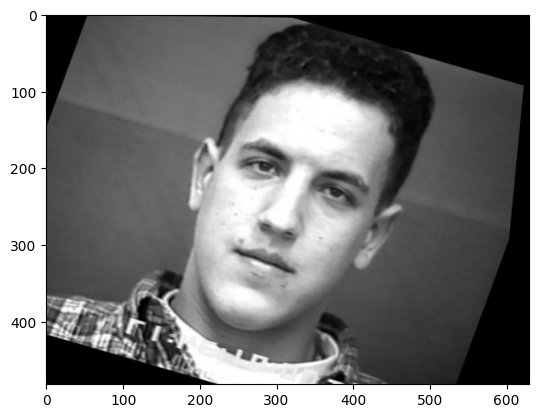

In [160]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('train/neutral/neutral565.jpg')
imgplot = plt.imshow(img)
plt.show()

In [161]:
cb1.feature_importances_

array([3.1687705 , 7.13354443, 2.23136355, 2.17983613, 4.61890661,
       1.8949286 , 2.33570024, 3.49509392, 2.73501954, 2.72122859,
       2.84613933, 4.76985897, 2.18803561, 3.93161931, 3.16892047,
       5.89685821, 8.47242227, 2.54146711, 2.11917567, 2.23683292,
       3.93024659, 3.94870248, 4.59004335, 4.81630559, 3.77223654,
       3.10318397, 2.67022257, 2.48333691])

In [157]:
check_matrix[(check_matrix['pred'] != check_matrix['target'])]

,teta1,teta2,teta3,teta4,teta5,teta6,teta7,teta8,teta9,teta10,...,l_cheek_lip,r_eye_brow_in,l_eye_brow_in,r_eye_brow_out,l_eye_brow_out,r_eye_nose_in,l_eye_nose_in,path,target,pred
2452,67.493949,132.524121,92.996576,90.355174,52.129269,54.632186,122.394889,59.503980,114.710663,162.143134,...,0.186667,0.107331,0.101368,0.120185,0.106416,0.125220,0.106750,train/Happy/happy941.jpg,happy,neutral
1104,31.648945,146.926767,146.541460,142.605704,92.320536,29.051046,57.665558,14.597630,152.845980,103.134419,...,0.279546,0.104207,0.095049,0.110355,0.123270,0.117876,0.147555,train/Sad/sad172.jpg,sad,disgust
3890,34.315620,142.605769,160.502879,151.555535,82.523661,34.546165,74.144058,23.749591,142.922314,122.583826,...,0.277511,0.112088,0.097322,0.135296,0.129234,0.157760,0.156661,train/disgust/disgust28.jpg,disgust,neutral
182,54.148233,127.691295,134.561471,110.556470,46.901506,57.639789,118.117306,44.603682,104.940712,151.357404,...,0.240270,0.075036,0.065657,0.082412,0.094914,0.118122,0.139437,train/neutral/neutral565.jpg,neutral,disgust
62,39.987045,150.797980,132.831851,115.298912,71.979238,37.213306,96.491141,25.634321,135.180122,158.790475,...,0.206388,0.089594,0.115438,0.099597,0.103098,0.162819,0.126144,train/neutral/neutral577.jpg,neutral,disgust
4535,58.912726,99.246493,115.040218,94.229971,52.224518,40.559298,93.527050,167.469041,102.529193,136.584331,...,0.223304,0.087133,0.081365,0.099194,0.076558,0.123224,0.111584,train/disgust/disgust640.jpg,disgust,surprise
1632,62.425678,105.156223,102.127482,86.002858,48.392977,66.836689,130.830063,38.850607,107.612990,154.538679,...,0.223665,0.101670,0.097281,0.090177,0.113204,0.113671,0.121763,train/Sad/sad867.jpg,sad,neutral
2940,29.431148,146.942637,135.333630,128.872762,84.224268,49.332184,98.022442,25.502848,149.096512,113.470183,...,0.293096,0.100809,0.083475,0.102737,0.110744,0.159979,0.166417,train/Surprise/surprise254.jpg,surprise,disgust
3615,32.174159,144.143334,141.395274,134.476890,81.316342,52.083849,113.434537,18.148261,142.903967,128.194162,...,0.296610,0.151050,0.109198,0.124937,0.131957,0.142892,0.155231,train/Surprise/surprise116.jpg,surprise,sad
3570,52.869284,106.666167,115.873550,96.862376,36.808078,57.652133,107.475187,167.470439,57.375363,113.377446,...,0.234713,0.088765,0.104351,0.096816,0.097315,0.102689,0.174508,train/Surprise/surprise302.jpg,surprise,sad


In [82]:
df_1[df_1['mistake']!=0]

,index,l_eye_w,l_eye_h,r_eye_w,r_eye_h,eyes_h_dist,eyes_w_dist,lips_h_dist,lips_w_dist,cheeks_h_dist,...,l_shoulder_lip,l_shoulder_cheek,l_shoulder_eye,l_shoulder_eye_h,l_shoulder_eye_w,path,picture,target,prediction,mistake
19,19,29.068884,11.045361,37.161808,12.000000,26,93,11,59,31,...,280.331652,430.048581,448.025769,416.346989,165.475903,sleeping/-----18-08-2022--14-23--2_jpg.rf.3782...,s19,1,0,-1
49,49,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,...,352.467293,331.275513,394.770456,374.503107,124.864469,sleeping/2022-08-17-133246_jpg.rf.17e70a38e27a...,s49,1,0,-1
79,79,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,...,27.888906,47.862334,58.345613,58.337021,1.001301,sleeping/2022-08-17-133145_jpg.rf.295bbfd8c45d...,s79,1,0,-1
81,81,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,...,248.249903,297.031954,335.725635,314.707336,116.923027,sleeping/2022-08-17-133235_jpg.rf.b0ffaa9f0568...,s81,1,0,-1
107,107,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,...,18.137867,26.800418,29.338898,23.871317,17.056704,sleeping/-----18-08-2022--12-28--2_jpg.rf.47b0...,s107,1,0,-1
109,109,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,...,118.209229,236.972940,234.602046,211.938438,100.599296,sleeping/2022-08-17-133310_jpg.rf.eeae9fbda8c6...,s109,1,0,-1
133,133,34.713110,9.055385,48.104054,10.816654,27,99,20,57,39,...,229.356538,482.897441,468.989124,447.895660,139.069319,sleeping/2022-08-17-131913_jpg.rf.8cf270f7f8f0...,s133,1,0,-1
196,196,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,...,217.191078,213.965970,249.354267,241.632142,61.574821,sleeping/-----18-08-2022--12-32_jpg.rf.d8ad9a6...,s196,1,0,-1
247,40,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,awake/2022-08-18-153632_jpg.rf.dba87a239348b34...,n40,0,1,1
268,61,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,awake/2022-08-18-153615_jpg.rf.b62690164511a0f...,n61,0,1,1


In [43]:
((df_1.drop(['index','picture','path','target'], axis=1).iloc[-1]-df_1.drop(['index','picture','path','target'], axis=1).iloc[-2])/10)

teta1        54.847604
teta2       395.839402
teta3       187.249286
teta4       142.808293
teta5         8.049223
teta6     10813.282421
teta7         2.140247
teta8         3.809704
teta9       484.499217
teta10     1642.091559
dtype: float64